# Vectorized Fit
use it for fitting an histogram

To create a vectorized function (if ROOT has been compiled with support for vectorization)
is very easy. One needs to create the TF1 object with the option "VEC" or call the method
TF1::SetVectorized




**Author:** Lorenzo Moneta  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:33 AM.</small></i>

In [1]:
gStyle->SetOptFit(111111);


ROOT::Math::MinimizerOptions::SetDefaultMinimizer("Minuit2");

int nbins = 40000;
auto h1 = new TH1D("h1","h1",nbins,-3,3);
h1->FillRandom("gaus",nbins*50);
auto c1 = new TCanvas("Fit","Fit",800,1000);
c1->Divide(1,2);
c1->cd(1);
TStopwatch w;

std::cout << "Doing Serial Gaussian Fit " << std::endl;
auto f1 = new TF1("f1","gaus");
f1->SetNpx(nbins*10);
w.Start();
h1->Fit(f1);
h1->Fit(f1,"L+");
w.Print();

std::cout << "Doing Vectorized Gaussian Fit " << std::endl;
auto f2 = new TF1("f2","gaus",-3,3,"VEC");

Doing Serial Gaussian Fit 

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      40217.9
NDf                       =        39409
Edm                       =  3.38965e-08
NCalls                    =           75
Constant                  =      120.018   +/-   0.105817    
Mean                      =   0.00114402   +/-   0.000709328 
Sigma                     =     0.979817   +/-   0.000519995  	 (limited)

****************************************
Minimizer is Minuit2 / Migrad
MinFCN                    =      20355.3
Chi2                      =      45321.3
NDf                       =        39997
Edm                       =  8.98045e-10
NCalls                    =           65
Constant                  =      120.024   +/-   0.105551    
Mean                      =  0.000138332   +/-   0.000716607 
Sigma                     =      0.99985   +/-   0.000537073  	 (limited)
Real time 0:00:00, CP time 0.500
Doing Vectorized Gaussian Fit 


Alternativly you can also use the tf1::setvectorized function
f2->SetVectorized(true); 

In [2]:
w.Start();
h1->Fit(f2);
h1->Fit(f2,"L+");
w.Print();


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      40217.9
NDf                       =        39409
Edm                       =  3.38965e-08
NCalls                    =           75
Constant                  =      120.018   +/-   0.105817    
Mean                      =   0.00114402   +/-   0.000709328 
Sigma                     =     0.979817   +/-   0.000519995  	 (limited)

****************************************
Minimizer is Minuit2 / Migrad
MinFCN                    =      20355.3
Chi2                      =      45321.3
NDf                       =        39997
Edm                       =  8.98045e-10
NCalls                    =           65
Constant                  =      120.024   +/-   0.105551    
Mean                      =  0.000138332   +/-   0.000716607 
Sigma                     =      0.99985   +/-   0.000537073  	 (limited)
Real time 0:00:00, CP time 0.450


Rebin histograms and scale it back to the function

In [3]:
h1->Rebin(nbins/100);
h1->Scale(100./nbins);
((TF1 *)h1->GetListOfFunctions()->At(0))->SetTitle("Chi2 Fit");
((TF1 *)h1->GetListOfFunctions()->At(1))->SetTitle("Likelihood Fit");
((TF1 *)h1->GetListOfFunctions()->At(1))->SetLineColor(kBlue);

C1->cd(1)->buildlegend();

/ do a polynomail fit now

In [4]:
c1->cd(2);
auto f3 = new TF1("f3","[A]*x^2+[B]*x+[C]",0,10);
f3->SetParameters(0.5,3,2);
f3->SetNpx(nbins*10);

Generate the events

In [5]:
auto h2 = new TH1D("h2","h2",nbins,0,10);
h2->FillRandom("f3",10*nbins);
std::cout << "Doing Serial Polynomial Fit " << std::endl;
f3->SetParameters(2,2,2);
w.Start();
h2->Fit(f3);
h2->Fit(f3,"L+");
w.Print();

std::cout << "Doing Vectorized Polynomial Fit " << std::endl;
auto f4 = new TF1("f4","[A]*x*x+[B]*x+[C]",0,10);
f4->SetVectorized(true);
f4->SetParameters(2,2,2);
w.Start();
h2->Fit(f4);
h2->Fit(f4,"L+");
w.Print();

Doing Serial Polynomial Fit 

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =        37690
NDf                       =        38075
Edm                       =  3.47827e-15
NCalls                    =           72
A                         =     0.202001   +/-   0.00176461  
B                         =     0.268032   +/-   0.0153893   
C                         =      1.05504   +/-   0.0248331   

****************************************
Minimizer is Minuit2 / Migrad
MinFCN                    =      20527.5
Chi2                      =      48394.2
NDf                       =        39997
Edm                       =  8.16351e-08
NCalls                    =           90
A                         =     0.149763   +/-   0.00165111  
B                         =     0.880262   +/-   0.0135143   
C                         =       0.6066   +/-   0.0181308   
Real time 0:00:00, CP time 0.480
Doing Vectorized Polynomial Fit 

*******************

Rebin histograms and scale it back to the function

In [6]:
h2->Rebin(nbins/100);
h2->Scale(100./nbins);
((TF1 *)h2->GetListOfFunctions()->At(0))->SetTitle("Chi2 Fit");
((TF1 *)h2->GetListOfFunctions()->At(1))->SetTitle("Likelihood Fit");
((TF1 *)h2->GetListOfFunctions()->At(1))->SetLineColor(kBlue);

C1->cd(2)->buildlegend();

Draw all canvases 

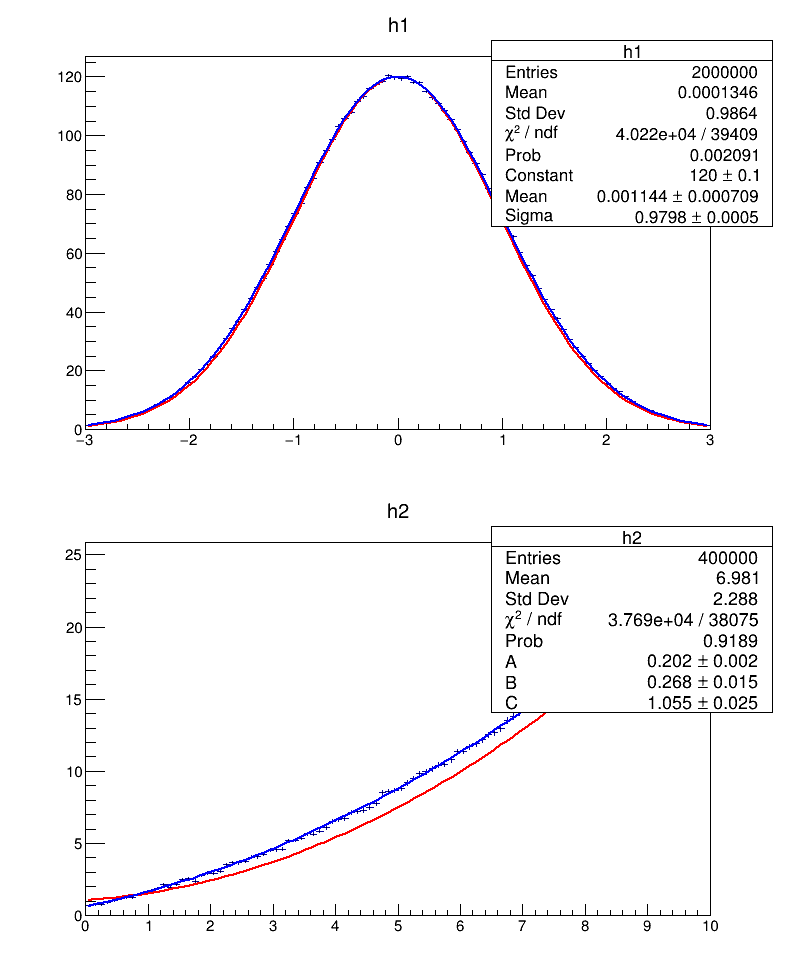

In [7]:
gROOT->GetListOfCanvases()->Draw()